# PHYS 481 Assignment 8: Poisson's Equation

### Author 1 (30114124) Aki
### Author 2 (30133483) Yuwan
### Author 3 (30154399) Christian
### Author 4 (30133957) Hayden

## Introduction

This assignment studies the Poisson's Equation using the Jacobi iteration and a direct matrix solution. In order to solve the Laplace's equation in 2D which includes different charge densities rho = 1 nC/m^3, 100 nC/m^3m and 1000 nC/m^3. 

## Q1

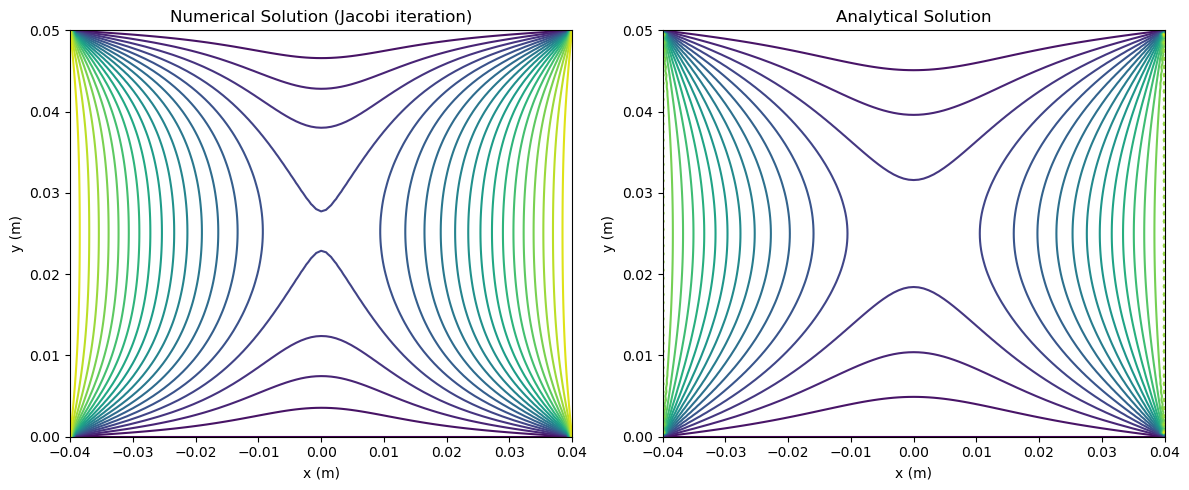

In [35]:
import numpy as np
import matplotlib.pyplot as plt

def jacobi(V, nx, ny): 
    '''
    Perform Jacobi iteration to solve Laplace's equation numerically.

    Parameters:
      V (numpy.ndarray): initial potential array.
      nx (int): number of points in the x-direction.
      ny (int): number of points in the y-direction.

    Returns:
      numpy.ndarray: updated potential array after Jacobi iteration.
    '''
    # Jacobi iteration
    max_iterations = 1000
    tolerance = 1e-5
    
    # simulate Jacobi iteration
    for iteration in range(max_iterations):
        V_old = V.copy()
    
        for i in range(1, nx - 1):
            for j in range(1, ny - 1):
                V[i, j] = 0.25 * (V[i, j-1] + V[i, j+1] + V[i-1, j] + V[i+1, j])
    
        # check for convergence
        if np.max(np.abs(V - V_old)) < tolerance:
            print(f"Converged in {iteration + 1} iterations.")
            break
            
    return V


def analytical_solution(x, y, a, b, V0, terms=50):
    '''
    Calculate the analytical solution to Laplace's equation.

    Parameters:
      x (numpy.ndarray): x-coordinates.
      y (numpy.ndarray): y-coordinates.
      a (float): height of the channel.
      b (float): half-width of the channel.
      V0 (float): constant potential.
      terms (int): number of terms in the series.

    Returns:
      numpy.ndarray: analytical solution values.
    '''
    result = np.zeros_like(x)
    for n in range(1, 2 * terms, 2):
        result += (1 / n) * np.cosh(n * np.pi * x / a) / np.cosh(n * np.pi * b / a) * np.sin(n * np.pi * y / a)

    return (4 * V0 / np.pi) * result


# constants and discretization parameters
a = 0.05  # height of the channel (in meters)
b = 0.04  # half-width of the channel (in meters)
V0 = 4.0  # constant potential (in volts)
nx = 101  # number of points in the x-direction
ny = 101  # number of points in the y-direction
dx = b / (nx - 1)
dy = a / (ny - 1)

# initialize the potential array for Jacobi iteration
V = np.zeros((nx, ny))
X = np.linspace(-b, b, nx)
Y = np.linspace(0, a, ny)

# set boundary conditions for Jacobi iteration
V[:, 0] = 0.0   # grounded plate at y=0
V[:, -1] = 0.0  # grounded plate at y=a
V[0, :] = V0    # potential V0 at x=-b
V[-1, :] = V0   # potential V0 at x=b

# Generate grid for analytical solution
x_analytical = np.linspace(-b, b, nx)
y_analytical = np.linspace(0, a, ny)
X_analytical, Y_analytical = np.meshgrid(x_analytical, y_analytical)

# obtain numerical and analytical values
jacobi_values = jacobi(V, nx, ny)
analytical_solution_values = analytical_solution(X_analytical, Y_analytical, a, b, V0)

# plot both solutions side by side
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.contour(X, Y, jacobi_values.T, levels=20, cmap='viridis')
plt.title('Numerical Solution (Jacobi iteration)')
plt.xlabel('x (m)')
plt.ylabel('y (m)')

plt.subplot(1, 2, 2)
plt.contour(X_analytical, Y_analytical, analytical_solution_values, levels=20, cmap='viridis')
plt.title('Analytical Solution')
plt.xlabel('x (m)')
plt.ylabel('y (m)')

plt.tight_layout()
plt.show()

## Q2

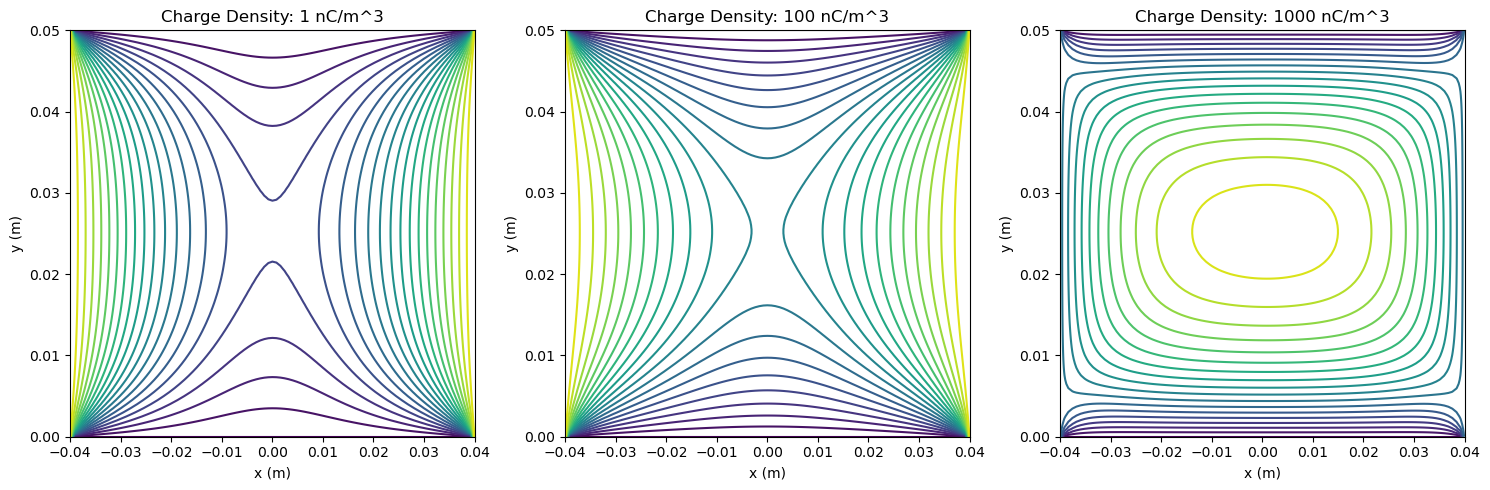

In [36]:
def jacobi_with_charge(V, rho, dx, dy, epsilon_0, nx, ny):
    '''
    Perform Jacobi iteration to solve Laplace's equation with charge density numerically.

    Parameters:
      V (numpy.ndarray): Initial potential array.
      rho (numpy.ndarray): Charge density array.
      dx (float): Grid spacing in the x-direction.
      dy (float): Grid spacing in the y-direction.
      epsilon_0 (float): Permittivity of free space.
      nx (int): Number of points in the x-direction.
      ny (int): Number of points in the y-direction.

    Returns:
      numpy.ndarray: Updated potential array after Jacobi iteration.
    '''
    # Jacobi iteration
    max_iterations = 1000
    tolerance = 1e-5
    
    for iteration in range(max_iterations):
        V_old = V.copy()
    
        for i in range(1, nx - 1):
            for j in range(1, ny - 1):
                V[i, j] = 0.25 * (V[i, j-1] + V[i, j+1] + V[i-1, j] + V[i+1, j]) + (0.25 * (rho[i, j] * dx * dy) / epsilon_0)
    
        # check for convergence
        if np.max(np.abs(V - V_old)) < tolerance:
            print(f"Converged in {iteration + 1} iterations.")
            break
            
    return V


# constants and discretization parameters
a = 0.05  # height of the channel (in meters)
b = 0.04  # half-width of the channel (in meters)
V0 = 4.0  # constant potential (in volts)
nx = 101  # number of points in the x-direction
ny = 101  # number of points in the y-direction
dx = b / (nx - 1)
dy = a / (ny - 1)

# initialize charge density arrays for three different densities
rho_1 = np.ones((nx, ny)) * 1e-9     # 1 nC/m^3
rho_100 = np.ones((nx, ny)) * 1e-7   # 100 nC/m^3
rho_1000 = np.ones((nx, ny)) * 1e-6  # 1000 nC/m^3

# initialize the potential array for Jacobi iteration
V = np.zeros((nx, ny))
X = np.linspace(-b, b, nx)
Y = np.linspace(0, a, ny)

# set boundary conditions for Jacobi iteration
V[:, 0] = 0.0   # grounded plate at y=0
V[:, -1] = 0.0  # grounded plate at y=a
V[0, :] = V0    # potential V0 at x=-b
V[-1, :] = V0   # potential V0 at x=b

# jacobi iteration with different charge densities
epsilon_0 = 8.85e-12  # permittivity of free space (F/m)
V_1 = jacobi_with_charge(V.copy(), rho_1, dx, dy, epsilon_0, nx, ny)
V_100 = jacobi_with_charge(V.copy(), rho_100, dx, dy, epsilon_0, nx, ny)
V_1000 = jacobi_with_charge(V.copy(), rho_1000, dx, dy, epsilon_0, nx, ny)

# plot potential with different charge densities
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.contour(X, Y, V_1.T, levels=20, cmap='viridis')
plt.title('Charge Density: 1 nC/m^3')
plt.xlabel('x (m)')
plt.ylabel('y (m)')

plt.subplot(1, 3, 2)
plt.contour(X, Y, V_100.T, levels=20, cmap='viridis')
plt.title('Charge Density: 100 nC/m^3')
plt.xlabel('x (m)')
plt.ylabel('y (m)')

plt.subplot(1, 3, 3)
plt.contour(X, Y, V_1000.T, levels=20, cmap='viridis')
plt.title('Charge Density: 1000 nC/m^3')
plt.xlabel('x (m)')
plt.ylabel('y (m)')

plt.tight_layout()
plt.show()

## Q3

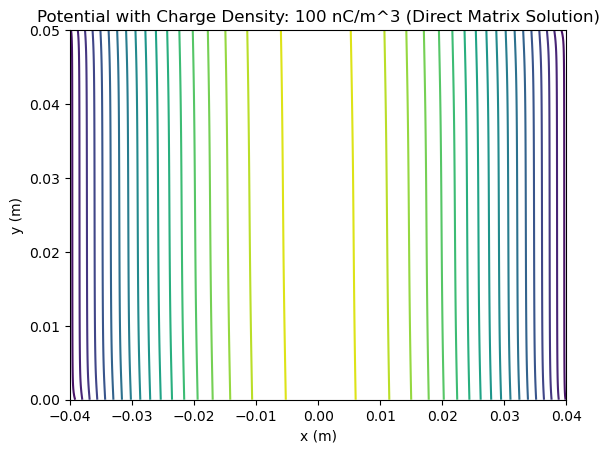

In [31]:
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

def direct(nx, ny, dx, dy, epsilon_0, V_100):
    '''
    Solve Laplace's equation with a charge density using a direct matrix solution.

    Parameters:
      nx (int): Number of points in the x-direction.
      ny (int): Number of points in the y-direction.
      dx (float): Grid spacing in the x-direction.
      dy (float): Grid spacing in the y-direction.
      epsilon_0 (float): Permittivity of free space (F/m).
      rho_100nCm3 (numpy.ndarray): Charge density array (100 nC/m^3).

    Returns:
      numpy.ndarray: 2D array representing the electric potential (V) over the grid.
    '''
    # create the coefficient matrix A for the discretized Laplace's equation
    main_diag = np.ones(nx * ny) * (-2 / dx**2 - 2 / dy**2)
    side_diag = np.ones(nx * ny - 1) / dx**2
    upper_diag = np.ones(nx * ny - nx) / dy**2
    lower_diag = np.ones(nx * ny - nx) / dy**2
    
    diagonals = [main_diag, side_diag, side_diag, upper_diag, lower_diag]
    offsets = [0, 1, -1, nx, -nx]
    A = diags(diagonals, offsets, shape=(nx * ny, nx * ny), format='csc')
    
    # create the right-hand side vector B
    B = -V_100.flatten() * dx * dy / epsilon_0
    
    # solve the linear system
    V = spsolve(A, B)
    
    # reshape the solution to a 2D array
    V = V.reshape((nx, ny))

    return V


# constants and discretization parameters
a = 0.05  # height of the channel (in meters)
b = 0.04  # half-width of the channel (in meters)
V0 = 4.0  # constant potential (in volts)
nx = 101  # number of points in the x-direction
ny = 101  # number of points in the y-direction
dx = b / (nx - 1)
dy = a / (ny - 1)
X = np.linspace(-b, b, nx)
Y = np.linspace(0, a, ny)
epsilon_0 = 8.85e-12  # permittivity of free space, F/m
V_100 = np.ones((nx, ny)) * 1e-7  # # charge density, 100 nC/m^3

# obtain V direct matrix solution 
V = direct(nx, ny, dx, dy, epsilon_0, V_100)

# plot the potential obtained with the direct matrix solution
plt.contour(X, Y, V.T, levels=20, cmap='viridis')
plt.title('Potential with Charge Density: 100 nC/m^3 (Direct Matrix Solution)')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.show()

## Conclusion

In conclusion, the Jacobi iteration remains superior than a direct matrix solution in this type of problem. This problem requires larger conditioned matrices so a direct matrix solution is not so helpful for accurate computation. However, direct matrix solvers converge more quickly to a solution than that of Jacobi iterations. As well, direct solutions requires constructing matrix A with N points that are large as N^2. But iterative solutions like Jacobi does not require a matrix A. So the plots from Q1 and Q2 are accurate plots to the Laplace's equation given. The only disadvantage is that it takes while for the plots to be made. 